In [31]:
import pandas as pd


file_path = r"/content/dataset.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')


data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [32]:
data.shape

(541909, 8)

In [33]:
len(data['Country'].unique())

38

In [34]:
print(f"Column names: {data.columns.tolist()}")

Column names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [35]:
print(data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [36]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [37]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [39]:
# Calculate the number of rows after dropping NaNs
num_rows_after_dropna = data[['Quantity', 'UnitPrice', 'CustomerID']].dropna().shape[0]

# Sample a maximum of all available rows after dropping NaNs
sample_size = min(num_rows_after_dropna, 50000)

# Now sample the data
sample_data = data[['Quantity', 'UnitPrice', 'CustomerID']].dropna().sample(sample_size, random_state=42)

In [40]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)

In [41]:

inertia_list = []
silhouette_scores = []

k_values = range(2, 11)
total_silhouette_score = 0

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)


    inertia = kmeans.inertia_
    inertia_list.append(inertia)


    silhouette_avg = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(silhouette_avg)


    total_silhouette_score += silhouette_avg


    print(f"For k = {k}, Inertia: {inertia}, Silhouette Score: {silhouette_avg}")


For k = 2, Inertia: 125098.09536154434, Silhouette Score: 0.9083501087314367
For k = 3, Inertia: 87939.97529342613, Silhouette Score: 0.5333353771951717
For k = 4, Inertia: 57714.42476512617, Silhouette Score: 0.5345682505598859
For k = 5, Inertia: 42720.34604951286, Silhouette Score: 0.5372225850610411
For k = 6, Inertia: 34632.30758227467, Silhouette Score: 0.5537148156413616
For k = 7, Inertia: 27612.16783871334, Silhouette Score: 0.47943371654656103
For k = 8, Inertia: 19719.022160282217, Silhouette Score: 0.4840224373657233
For k = 9, Inertia: 17164.72994968562, Silhouette Score: 0.4418234387490021
For k = 10, Inertia: 15737.545377565217, Silhouette Score: 0.44339743466664994


In [42]:

avg_silhouette_score = total_silhouette_score / len(k_values)


best_silhouette_score = max(silhouette_scores)


print(f"\nAverage Silhouette Score across all k values: {avg_silhouette_score}")
print(f"Best Silhouette Score: {best_silhouette_score} (at k = {k_values[silhouette_scores.index(best_silhouette_score)]})")


Average Silhouette Score across all k values: 0.5462075738352037
Best Silhouette Score: 0.9083501087314367 (at k = 2)


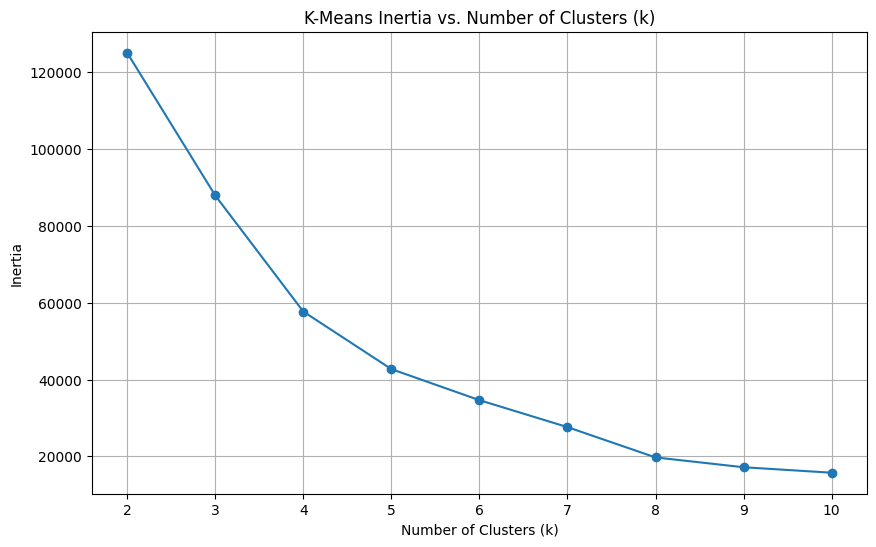

In [43]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_list, marker='o')
plt.title('K-Means Inertia vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

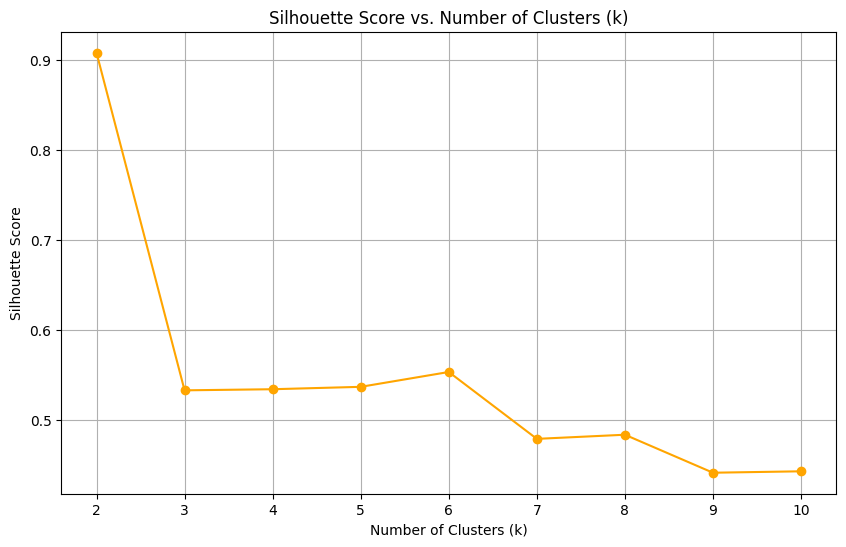

In [44]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

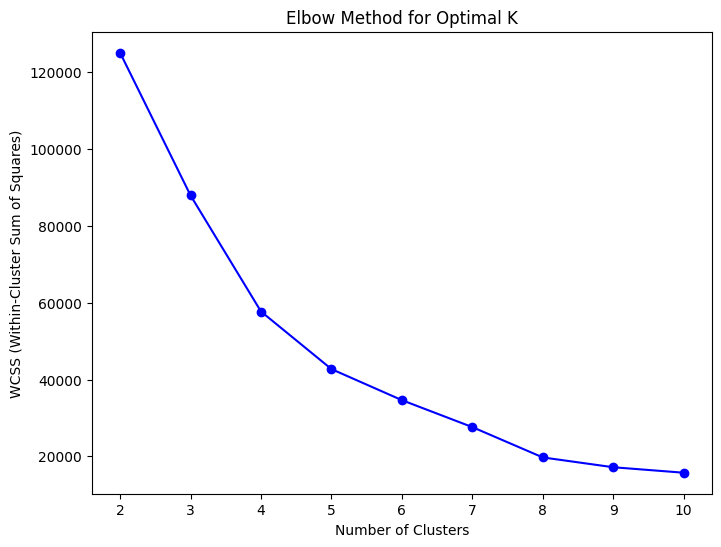

Optimal number of clusters (k): 6


In [46]:
# List to store WCSS values
wcss = []

# Fit the KMeans model with different number of clusters (2 to 11)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the current model

# Plot WCSS against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Calculate the change in WCSS (second derivative) to detect the elbow point
wcss_diff = np.diff(wcss)  # first derivative (difference between consecutive WCSS values)
wcss_diff2 = np.diff(wcss_diff)  # second derivative (difference between first derivatives)

# The elbow point corresponds to the point where the second derivative changes sign
# Find the index where the second derivative is minimal (this corresponds to the elbow point)
optimal_k = np.argmin(wcss_diff2) + 2  # Adding 2 because we used np.diff twice

# Print the optimal k value
print(f"Optimal number of clusters (k): {optimal_k}")

Silhouette Score: 0.4876379156526186


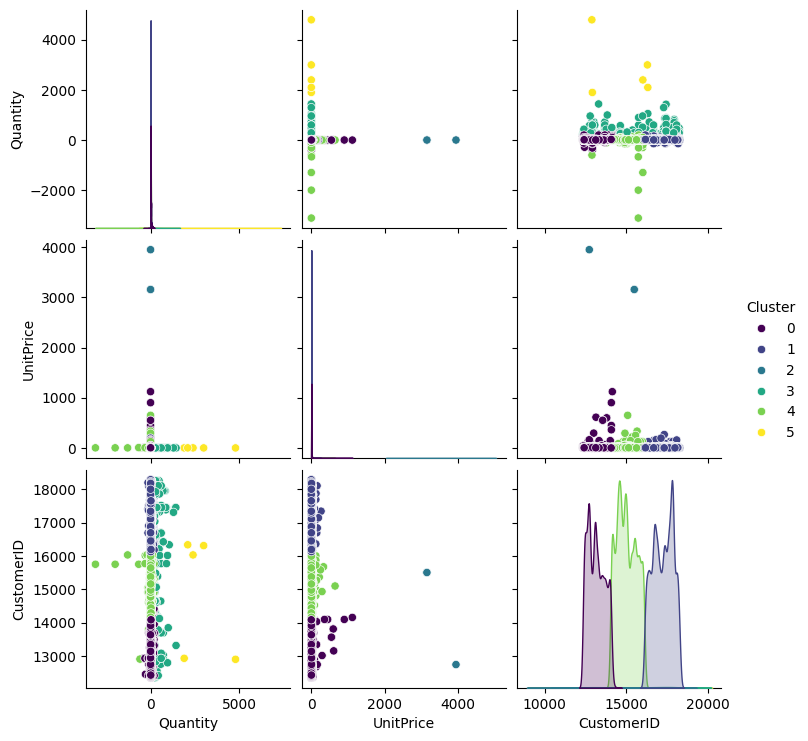

In [ ]:
import seaborn as sns


kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


sample_data['Cluster'] = clusters


silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


sns.pairplot(sample_data[['Quantity', 'UnitPrice', 'CustomerID', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()

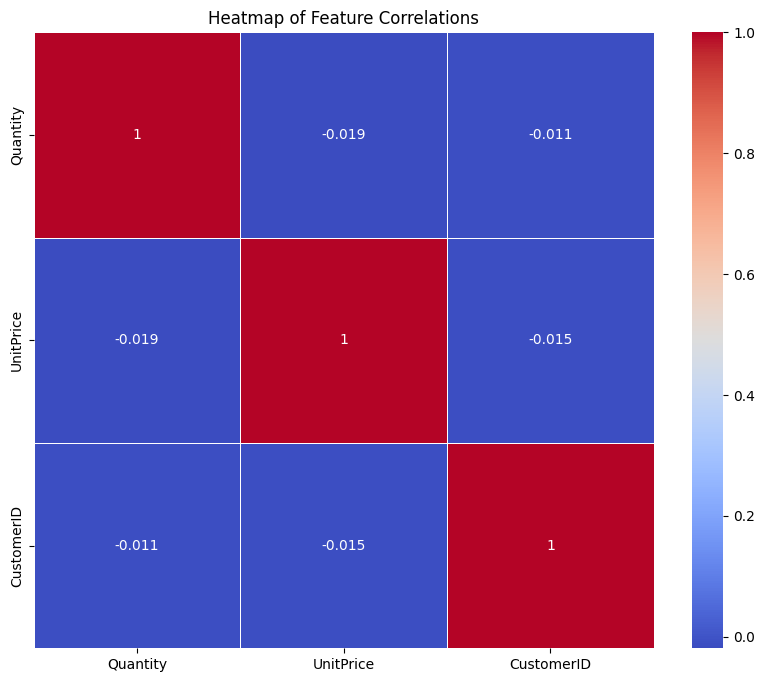

In [47]:

plt.figure(figsize=(10, 8))
sns.heatmap(sample_data[['Quantity', 'UnitPrice', 'CustomerID']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

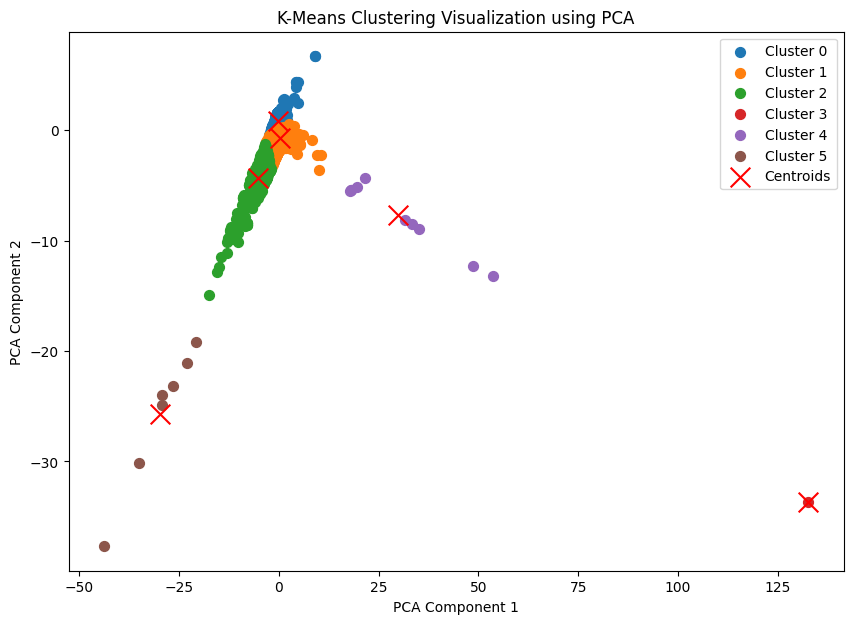

Silhouette Score: 0.5515


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)


plt.figure(figsize=(10, 7))
unique_labels = set(kmeans_labels)

for label in unique_labels:
    plt.scatter(pca_data[kmeans_labels == label, 0], pca_data[kmeans_labels == label, 1],
                label=f'Cluster {label}', s=50)


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')

plt.title('K-Means Clustering Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


sil_score = silhouette_score(pca_data, kmeans_labels)
print(f"Silhouette Score: {sil_score:.4f}")

In [6]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np


file_path = r"/content/dataset.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')


sample_data = data[['Quantity', 'UnitPrice', 'CustomerID']].dropna().sample(40000, random_state=42)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)


eps_values = np.arange(0.9,1.1,0.1)
min_samples = 5

silhouette_scores = []
eps_used = []

for eps in eps_values:

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)


    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)


    if num_clusters > 1:
        silhouette_avg = silhouette_score(scaled_data, labels)
        silhouette_scores.append(silhouette_avg)
        eps_used.append(eps)
        print(f"Epsilon: {eps}, Silhouette Score: {silhouette_avg}, Clusters formed: {num_clusters}")
    else:
        print(f"Epsilon: {eps}, Silhouette Score: Not applicable (only {num_clusters} cluster(s) formed or all points are noise)")


if silhouette_scores:
    avg_silhouette_score = np.mean(silhouette_scores)
    best_silhouette_score = max(silhouette_scores)
    best_eps = eps_used[silhouette_scores.index(best_silhouette_score)]

    print(f"\nAverage Silhouette Score across all valid epsilon values: {avg_silhouette_score}")
    print(f"Best Silhouette Score: {best_silhouette_score} (at Epsilon = {best_eps})")
else:
    print("\nNo valid silhouette scores were calculated (insufficient clusters formed).")

Epsilon: 0.9, Silhouette Score: 0.5790441183322095, Clusters formed: 5
Epsilon: 1.0, Silhouette Score: 0.5941044536293534, Clusters formed: 5
Epsilon: 1.1, Silhouette Score: 0.814456773422553, Clusters formed: 4

Average Silhouette Score across all valid epsilon values: 0.6625351151280386
Best Silhouette Score: 0.814456773422553 (at Epsilon = 1.1)


In [2]:
file_path='/content/dataset.csv'

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# Load the data
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Cleaning
data_cleaned = data.dropna(subset=['CustomerID', 'Country'])
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Select features and encode 'Country'
features = data_cleaned[['Country', 'Quantity', 'UnitPrice']]
features['Country'] = features['Country'].astype('category').cat.codes  # Encode 'Country' as a numeric category

# Sampling the data
sample_size = 30000
features_sampled = features.sample(n=sample_size, random_state=42)

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_sampled)

# PCA Transformation
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
features_pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])

# DBSCAN Parameters
eps_values = [0.3, 0.5, 0.7,0.9]
min_samples_values = [3, 5, 7]
results = []

# DBSCAN Clustering for Different Parameter Combinations
for eps in eps_values:
    for min_samples in min_samples_values:

        # DBSCAN Model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_pca_df)

        # Cluster and Noise Counts
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)

        # Calculate Silhouette Score if there are at least 2 clusters
        if n_clusters > 1:
            score = silhouette_score(features_pca_df, clusters)
        else:
            score = -1

        # Append results
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette_score': score
        })

        # Print results for each configuration
        print(f"eps: {eps}, min_samples: {min_samples} -> clusters: {n_clusters}, noise: {n_noise}, silhouette score: {score:.4f}")

# Save Results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('dbscan_results_country_customer_behavior.csv', index=False)
print("Clustering results saved to 'dbscan_results_country_customer_behavior.csv'")


<ipython-input-3-6880008213c9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Country'] = features['Country'].astype('category').cat.codes  # Encode 'Country' as a numeric category


eps: 0.3, min_samples: 3 -> clusters: 33, noise: 65, silhouette score: 0.5649
eps: 0.3, min_samples: 5 -> clusters: 20, noise: 120, silhouette score: 0.5630
eps: 0.3, min_samples: 7 -> clusters: 12, noise: 188, silhouette score: 0.5284
eps: 0.5, min_samples: 3 -> clusters: 22, noise: 37, silhouette score: 0.7329
eps: 0.5, min_samples: 5 -> clusters: 13, noise: 71, silhouette score: 0.7267
eps: 0.5, min_samples: 7 -> clusters: 5, noise: 115, silhouette score: 0.7703
eps: 0.7, min_samples: 3 -> clusters: 17, noise: 26, silhouette score: 0.7725
eps: 0.7, min_samples: 5 -> clusters: 9, noise: 56, silhouette score: 0.8100
eps: 0.7, min_samples: 7 -> clusters: 5, noise: 78, silhouette score: 0.8442
eps: 0.9, min_samples: 3 -> clusters: 10, noise: 23, silhouette score: 0.8349
eps: 0.9, min_samples: 5 -> clusters: 5, noise: 41, silhouette score: 0.8737
eps: 0.9, min_samples: 7 -> clusters: 3, noise: 55, silhouette score: 0.8728
Clustering results saved to 'dbscan_results_country_customer_behav

In [4]:
import numpy as np
import pandas as pd


valid_scores = results_df[results_df['silhouette_score'] != -1]



best_silhouette_score = valid_scores['silhouette_score'].max()


best_params = valid_scores[valid_scores['silhouette_score'] == best_silhouette_score].iloc[0]



print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
print(f"Best Parameters: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")

Best Silhouette Score: 0.8737
Best Parameters: eps = 0.9, min_samples = 5.0


<ipython-input-7-9500cfe5b23a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Country'] = features['Country'].astype('category')
<ipython-input-7-9500cfe5b23a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Country'] = country_labels


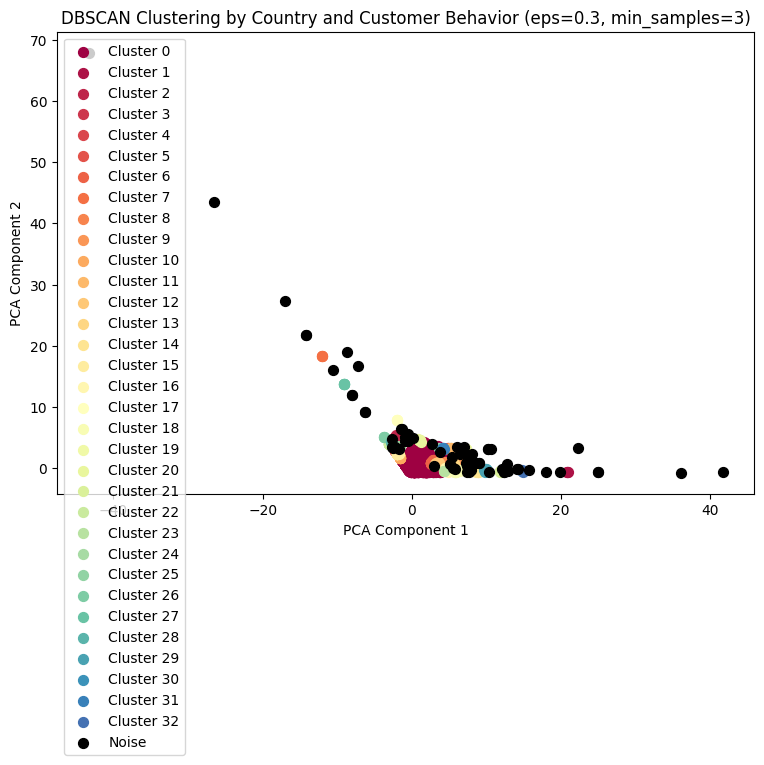

eps: 0.3, min_samples: 3 -> clusters: 33, noise: 65, silhouette score: 0.5649

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          29
         Australia                7
         Netherlands              7
         Spain                    5
         EIRE                     4
                                 ..
 32      Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 1258, dtype: int64




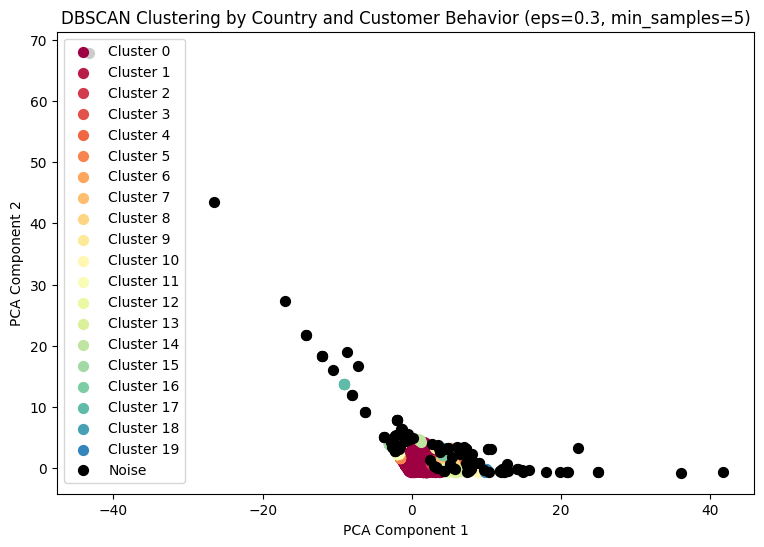

eps: 0.3, min_samples: 5 -> clusters: 20, noise: 120, silhouette score: 0.5630

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          53
         Australia               22
         EIRE                     8
         Netherlands              7
         Spain                    6
                                 ..
 19      Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 777, dtype: int64




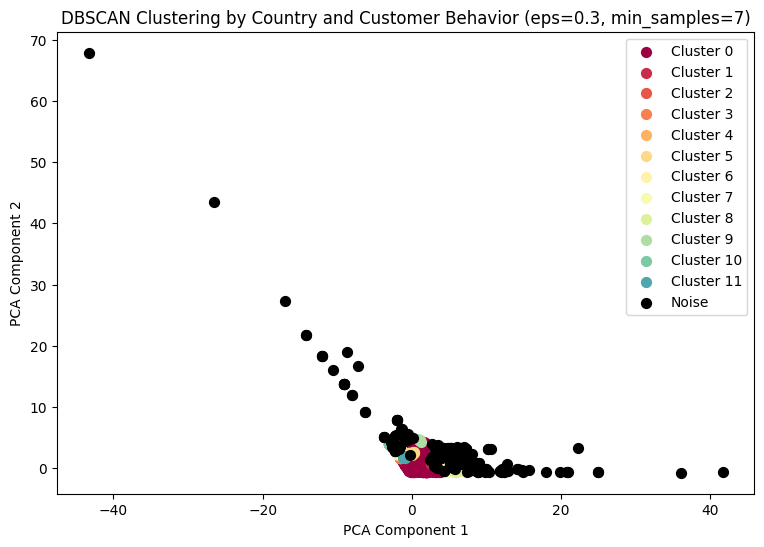

eps: 0.3, min_samples: 7 -> clusters: 12, noise: 188, silhouette score: 0.5284

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          71
         Australia               38
         EIRE                    21
         Netherlands             17
         Germany                  9
                                 ..
 11      Singapore                0
         Sweden                   0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 481, dtype: int64




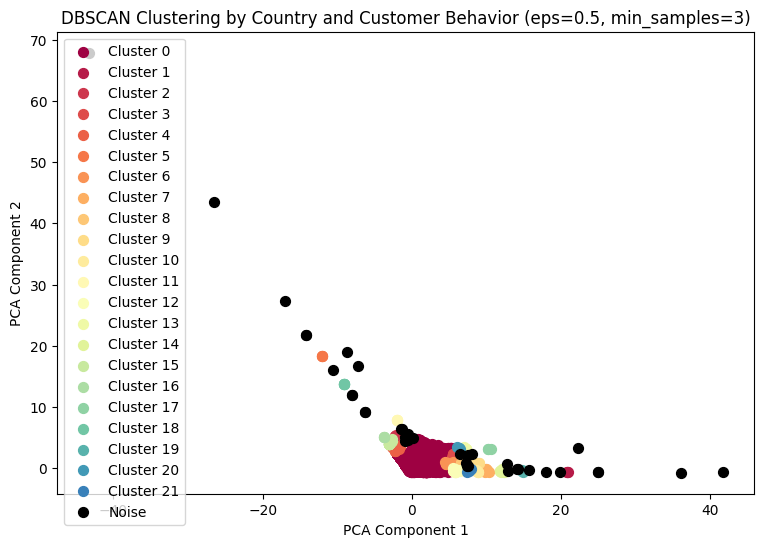

eps: 0.5, min_samples: 3 -> clusters: 22, noise: 37, silhouette score: 0.7329

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          18
         EIRE                     4
         Cyprus                   3
         Finland                  2
         Germany                  2
                                 ..
 21      Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 851, dtype: int64




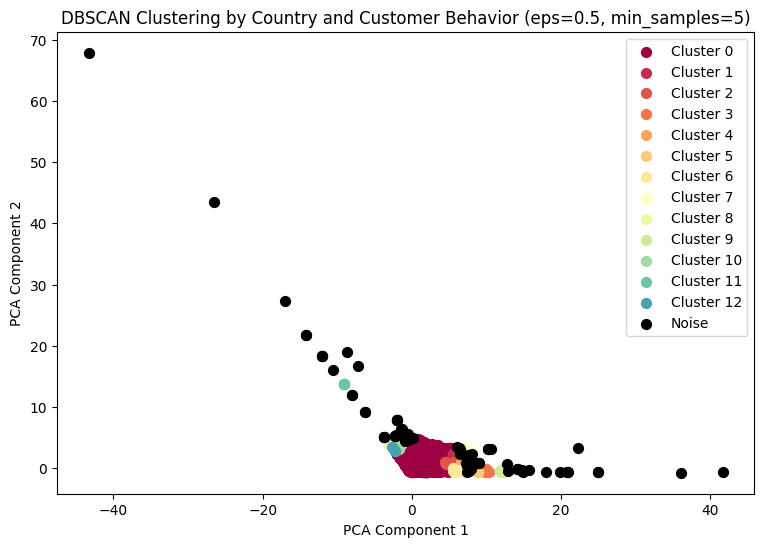

eps: 0.5, min_samples: 5 -> clusters: 13, noise: 71, silhouette score: 0.7267

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          33
         Australia                8
         EIRE                     8
         Netherlands              6
         Norway                   4
                                 ..
 12      Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 518, dtype: int64




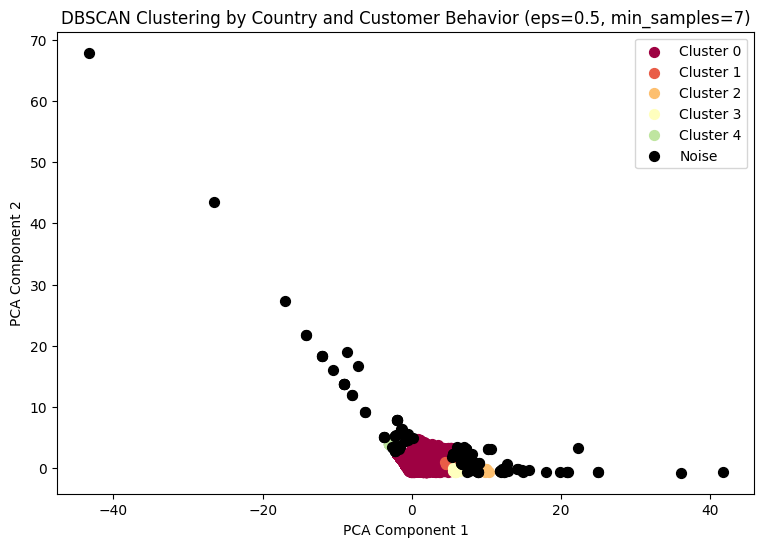

eps: 0.5, min_samples: 7 -> clusters: 5, noise: 115, silhouette score: 0.7703

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          56
         Australia               13
         EIRE                    13
         Netherlands             11
         Norway                   4
                                 ..
 4       Saudi Arabia             0
         Singapore                0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 222, dtype: int64




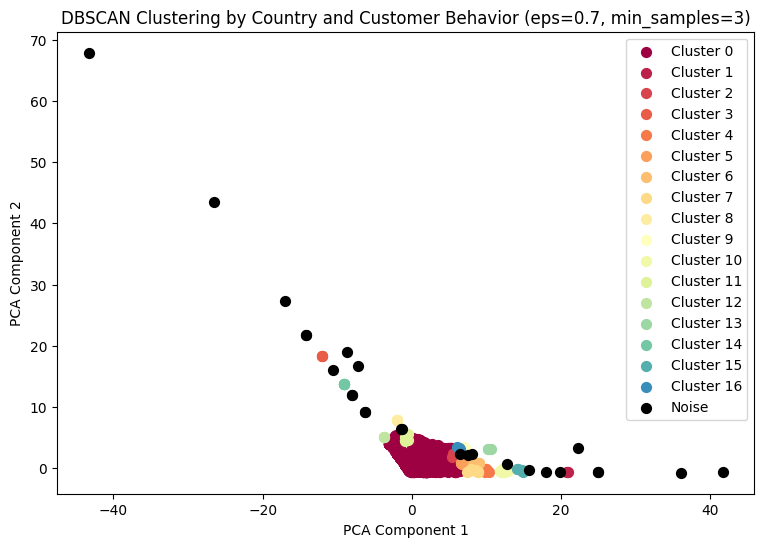

eps: 0.7, min_samples: 3 -> clusters: 17, noise: 26, silhouette score: 0.7725

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          15
         EIRE                     3
         Cyprus                   2
         Finland                  2
         Australia                1
                                 ..
 16      Switzerland              0
         USA                      0
         United Arab Emirates     0
         United Kingdom           0
         Unspecified              0
Name: count, Length: 666, dtype: int64




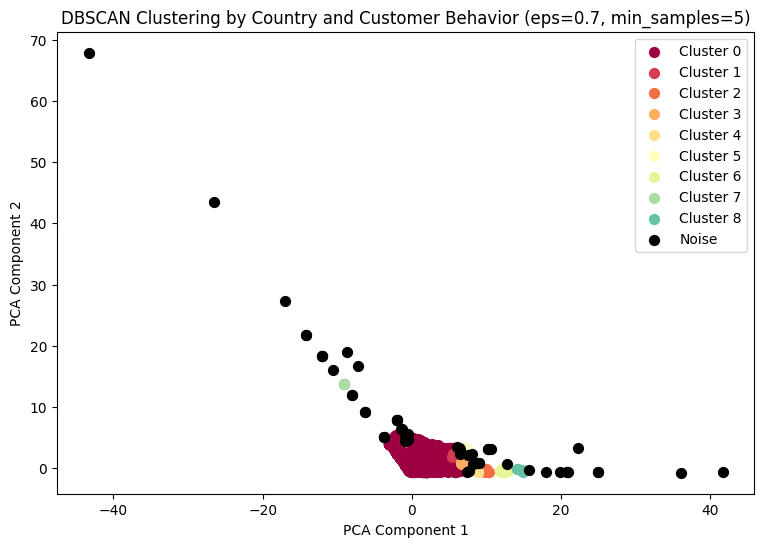

eps: 0.7, min_samples: 5 -> clusters: 9, noise: 56, silhouette score: 0.8100

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          26
         Australia                8
         EIRE                     8
         Netherlands              5
         Cyprus                   2
                                 ..
 8       Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 370, dtype: int64




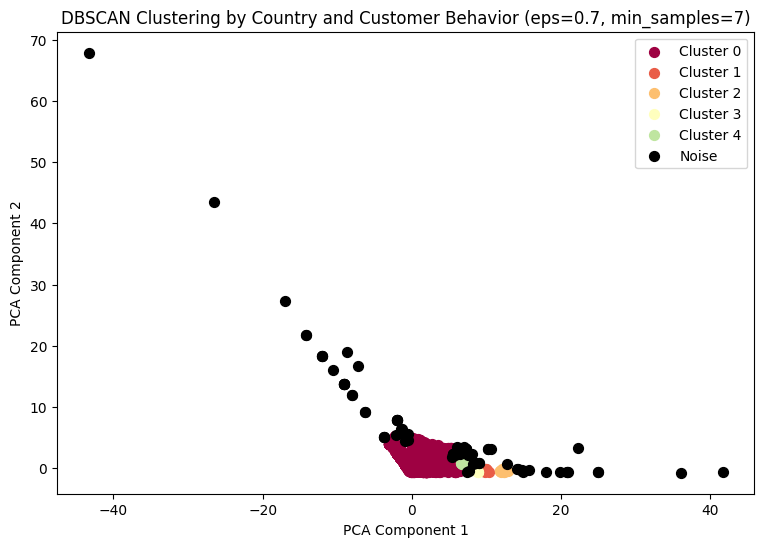

eps: 0.7, min_samples: 7 -> clusters: 5, noise: 78, silhouette score: 0.8442

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          36
         Australia               13
         EIRE                    13
         Netherlands              5
         Cyprus                   2
                                 ..
 4       Switzerland              0
         USA                      0
         United Arab Emirates     0
         United Kingdom           0
         Unspecified              0
Name: count, Length: 222, dtype: int64




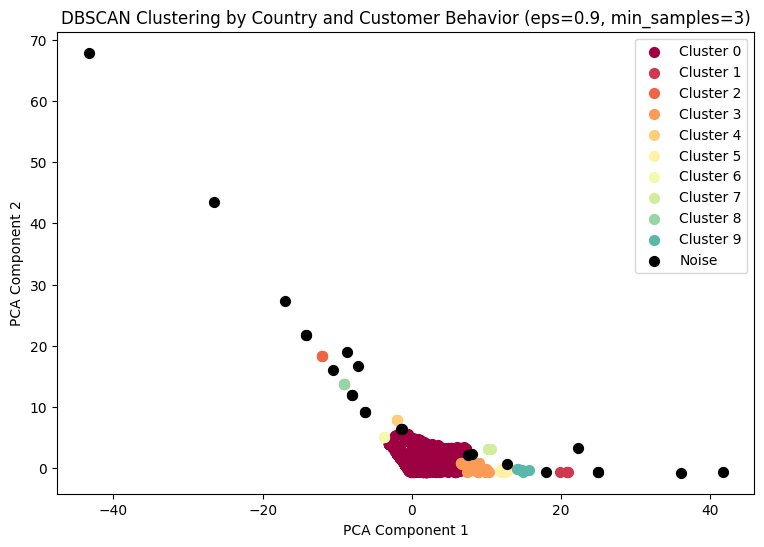

eps: 0.9, min_samples: 3 -> clusters: 10, noise: 23, silhouette score: 0.8349

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          13
         Cyprus                   2
         EIRE                     2
         Finland                  2
         Australia                1
                                 ..
 9       Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 407, dtype: int64




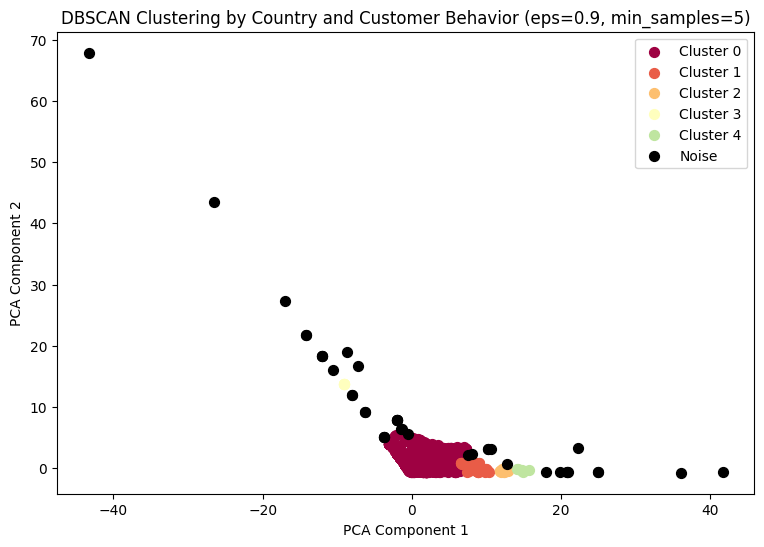

eps: 0.9, min_samples: 5 -> clusters: 5, noise: 41, silhouette score: 0.8737

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          23
         EIRE                     7
         Australia                4
         Cyprus                   2
         Finland                  2
                                 ..
 4       Sweden                   0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 222, dtype: int64




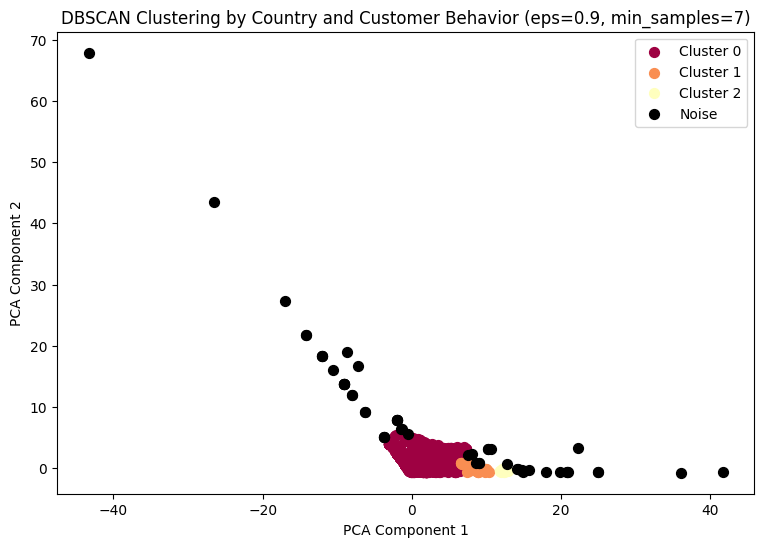

eps: 0.9, min_samples: 7 -> clusters: 3, noise: 55, silhouette score: 0.8728

Country distribution within each cluster:
Cluster  Country             
-1       United Kingdom          34
         EIRE                     7
         Australia                4
         Netherlands              4
         Cyprus                   2
                                 ..
 2       Spain                    0
         Switzerland              0
         USA                      0
         United Arab Emirates     0
         Unspecified              0
Name: count, Length: 148, dtype: int64




In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Cleaning
data_cleaned = data.dropna(subset=['CustomerID', 'Country'])
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Select features and encode 'Country'
features = data_cleaned[['Country', 'Quantity', 'UnitPrice']]
features['Country'] = features['Country'].astype('category')
country_labels = features['Country'].cat.codes  # Numeric encoding for 'Country'
country_names = features['Country']  # Keep original country names for final output

# Update the features with encoded country values
features['Country'] = country_labels

# Sampling the data
sample_size = 30000
features_sampled = features.sample(n=sample_size, random_state=42)
country_sampled = country_names.loc[features_sampled.index].reset_index(drop=True)  # Track country names for sampled data

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_sampled)

# PCA Transformation
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
features_pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])
features_pca_df['Country'] = country_sampled.values  # Add back country names for tracking

# DBSCAN Parameters
eps_values = [0.3, 0.5, 0.7,0.9]
min_samples_values = [3, 5, 7]

# DBSCAN Clustering for Different Parameter Combinations
for eps in eps_values:
    for min_samples in min_samples_values:

        # DBSCAN Model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_pca_df[['PCA1', 'PCA2']])
        features_pca_df['Cluster'] = clusters  # Add cluster labels to PCA dataframe

        # Plot DBSCAN Clustering Results
        plt.figure(figsize=(9, 6))
        unique_labels = set(clusters)

        for label in unique_labels:
            if label == -1:
                color = 'k'
                label_name = 'Noise'
            else:
                color = plt.cm.Spectral(float(label) / len(unique_labels))
                label_name = f'Cluster {label}'

            plt.scatter(features_pca_df[features_pca_df['Cluster'] == label]['PCA1'],
                        features_pca_df[features_pca_df['Cluster'] == label]['PCA2'],
                        c=[color], label=label_name, s=50)

        plt.title(f'DBSCAN Clustering by Country and Customer Behavior (eps={eps}, min_samples={min_samples})')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.show()

        # Cluster and Noise Counts
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)

        # Calculate Silhouette Score if there are at least 2 clusters
        if n_clusters > 1:
            score = silhouette_score(features_pca_df[['PCA1', 'PCA2']], clusters)
        else:
            score = -1

        # Print results for each configuration
        print(f"eps: {eps}, min_samples: {min_samples} -> clusters: {n_clusters}, noise: {n_noise}, silhouette score: {score:.4f}")

        # Display country distribution within each cluster
        cluster_country_distribution = features_pca_df.groupby('Cluster')['Country'].value_counts()
        print("\nCountry distribution within each cluster:")
        print(cluster_country_distribution)
        print("\n" + "="*50 + "\n")




<ipython-input-8-0ae413b048e2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Country'] = features['Country'].astype('category').cat.codes  # Encode the 'Country' column
<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edge

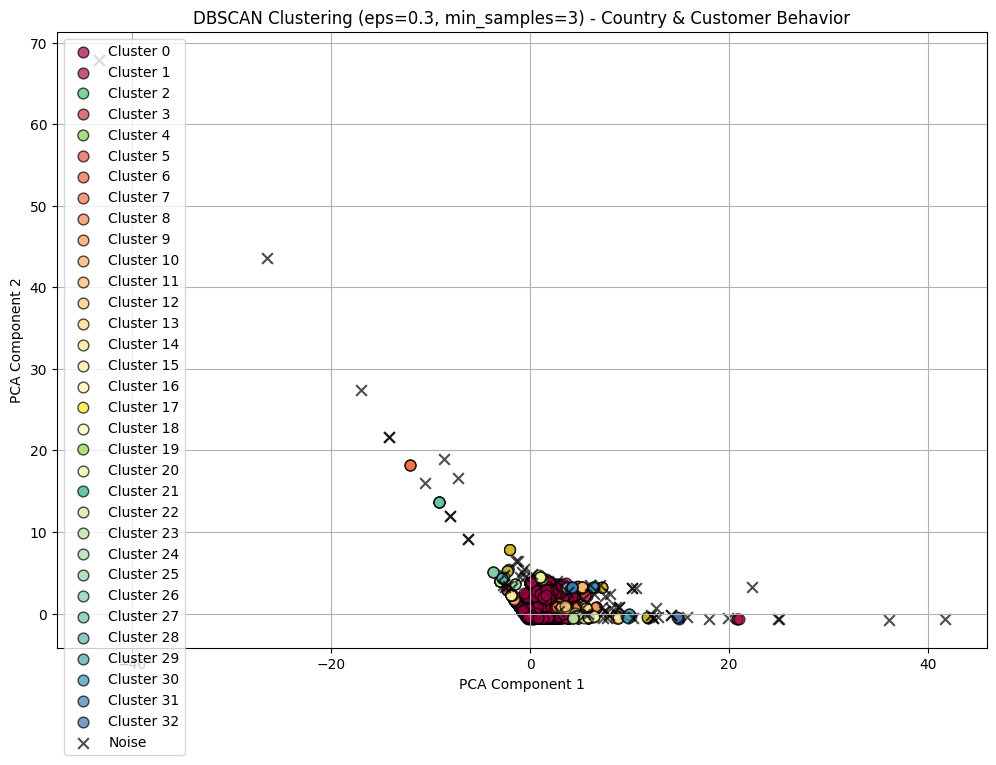

eps: 0.3, min_samples: 3 -> clusters: 33, noise: 65, silhouette score: 0.5649


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


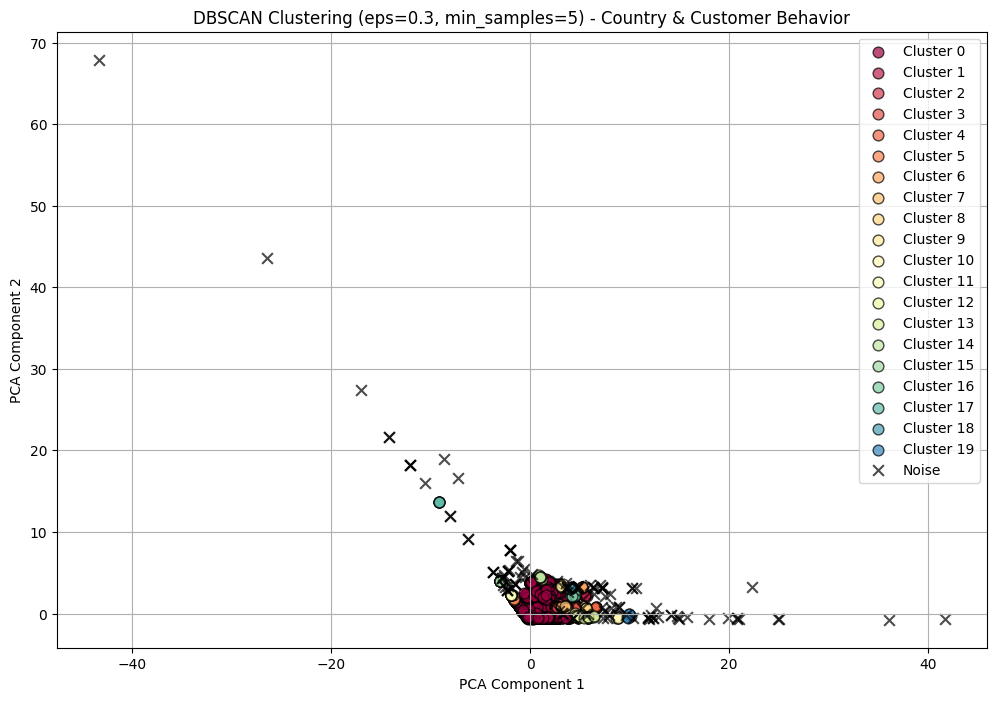

eps: 0.3, min_samples: 5 -> clusters: 20, noise: 120, silhouette score: 0.5630


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


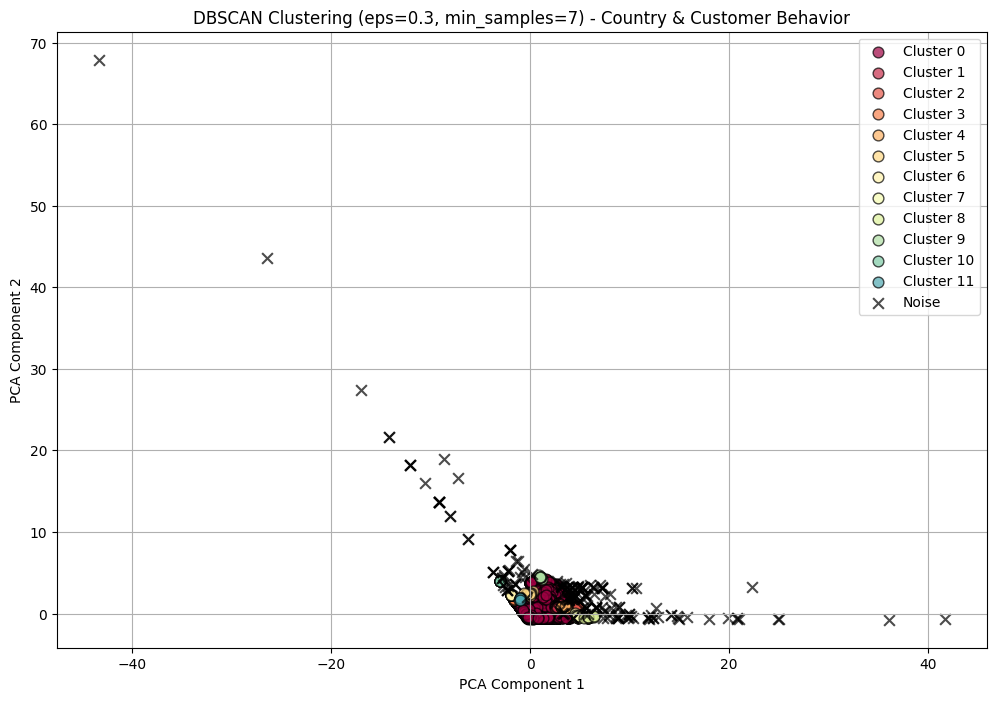

eps: 0.3, min_samples: 7 -> clusters: 12, noise: 188, silhouette score: 0.5284


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


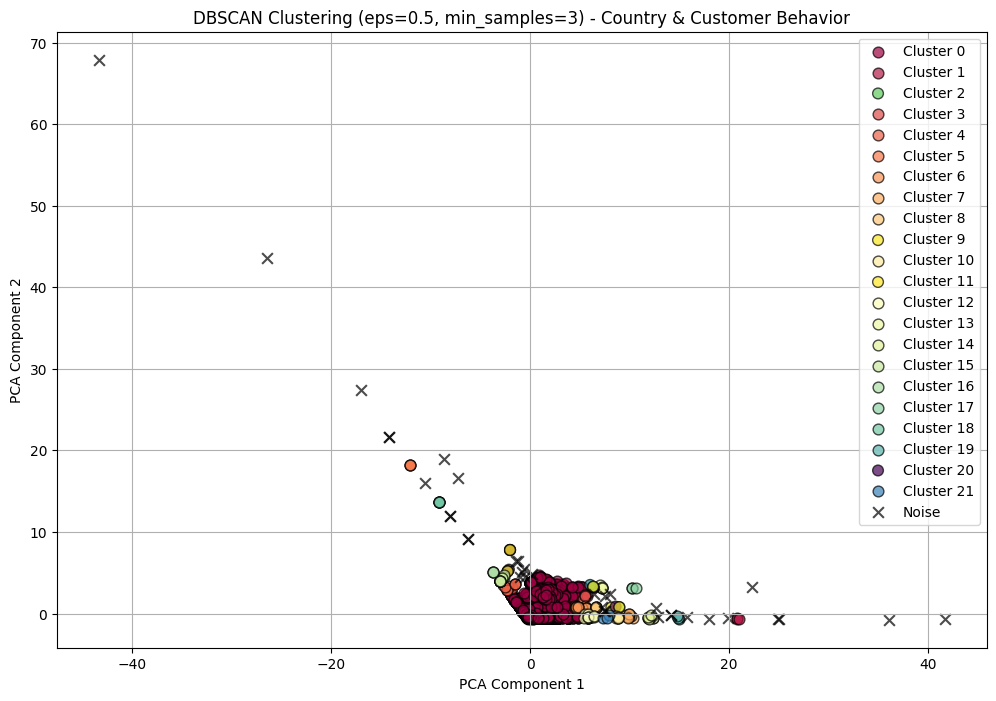

eps: 0.5, min_samples: 3 -> clusters: 22, noise: 37, silhouette score: 0.7329


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


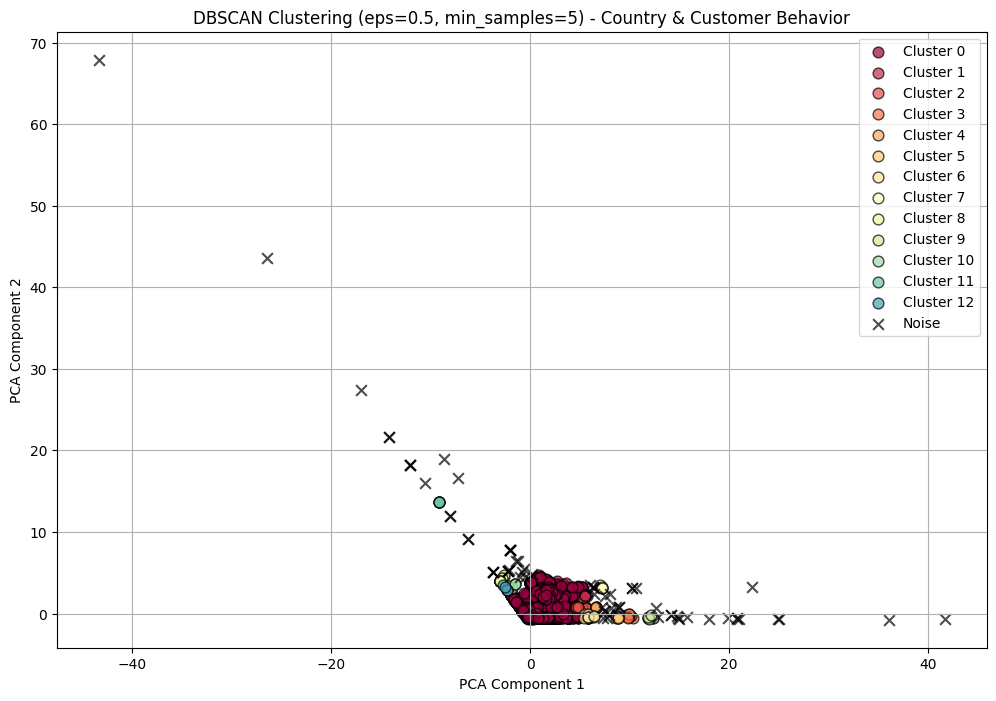

eps: 0.5, min_samples: 5 -> clusters: 13, noise: 71, silhouette score: 0.7267


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


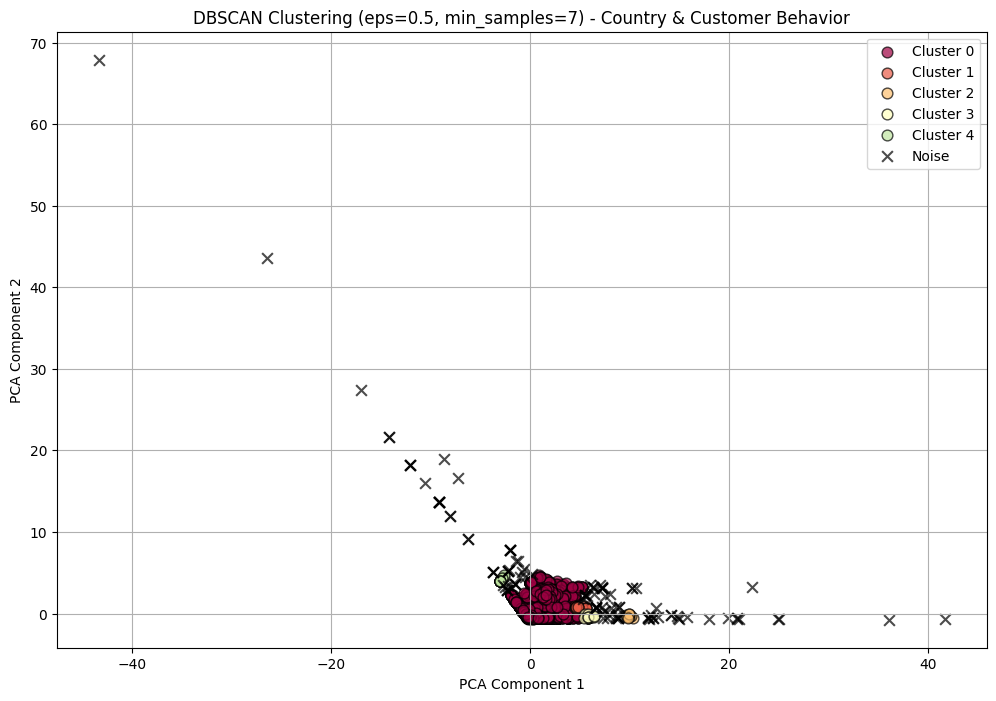

eps: 0.5, min_samples: 7 -> clusters: 5, noise: 115, silhouette score: 0.7703


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


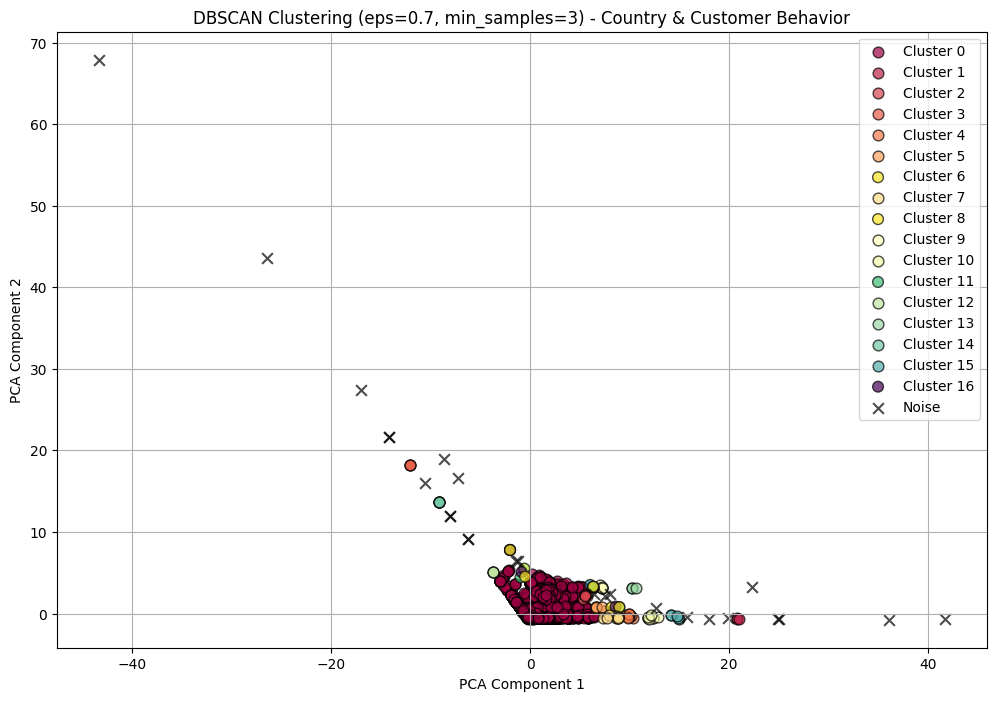

eps: 0.7, min_samples: 3 -> clusters: 17, noise: 26, silhouette score: 0.7725


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


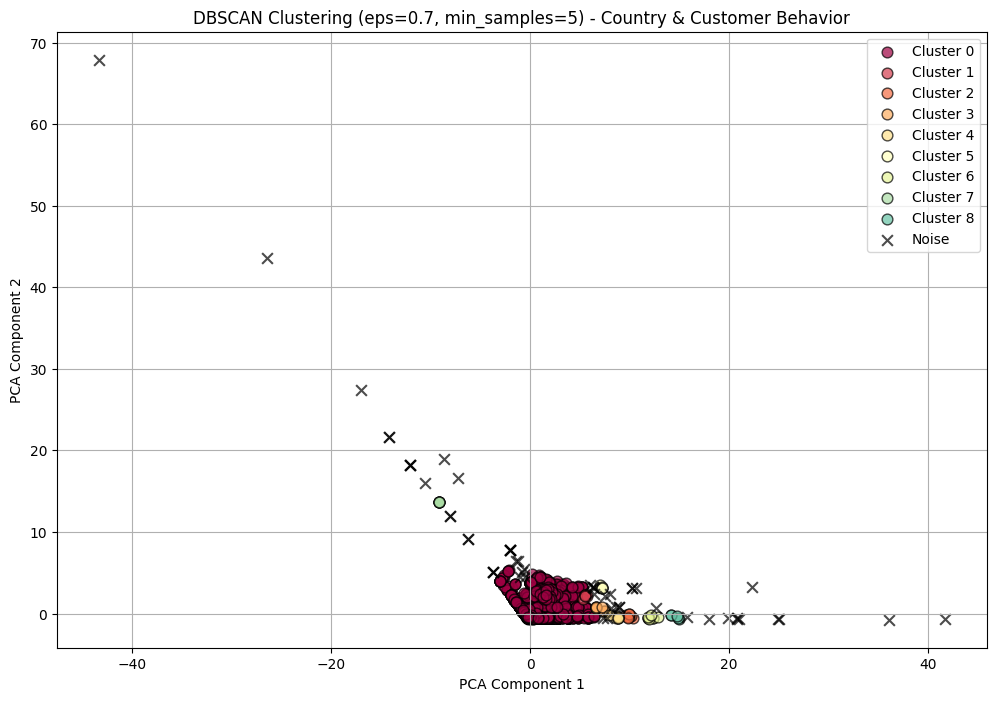

eps: 0.7, min_samples: 5 -> clusters: 9, noise: 56, silhouette score: 0.8100


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


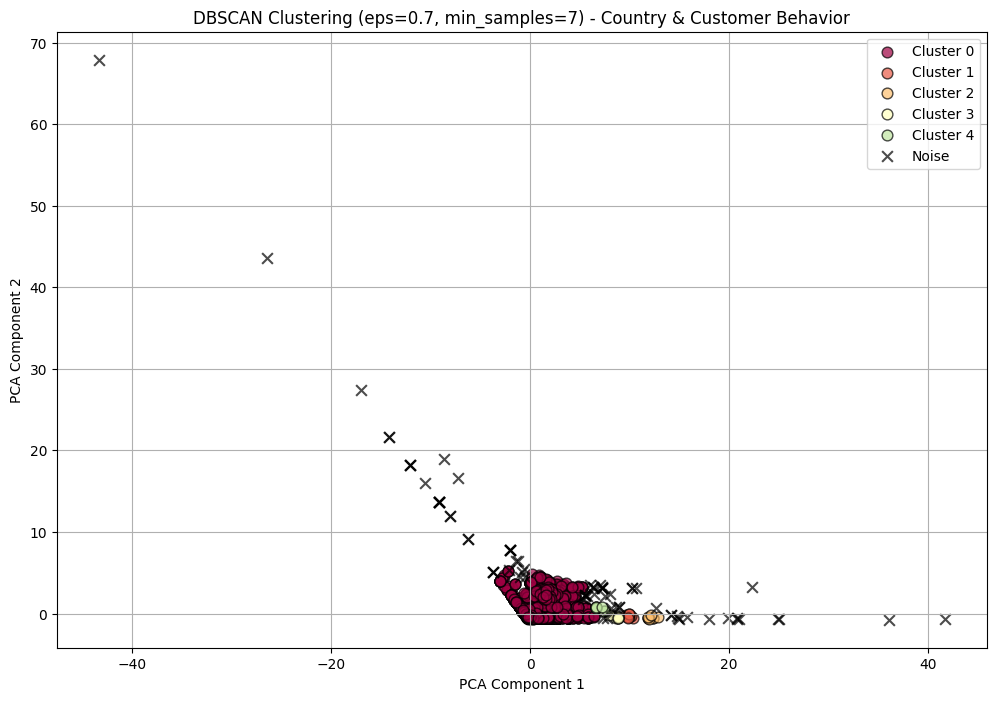

eps: 0.7, min_samples: 7 -> clusters: 5, noise: 78, silhouette score: 0.8442


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


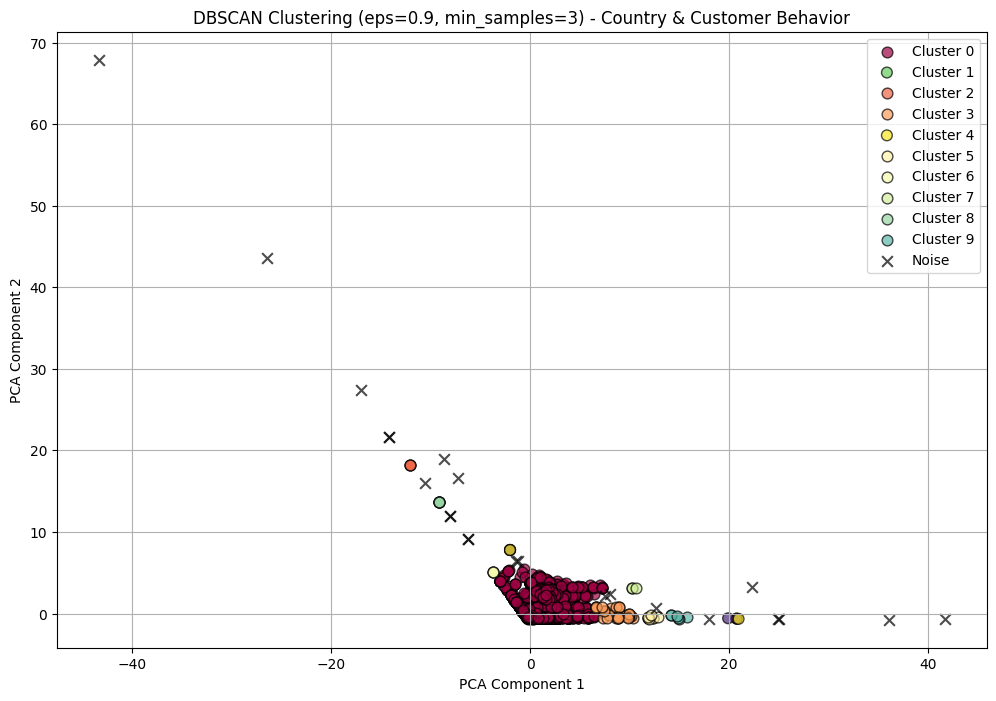

eps: 0.9, min_samples: 3 -> clusters: 10, noise: 23, silhouette score: 0.8349


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


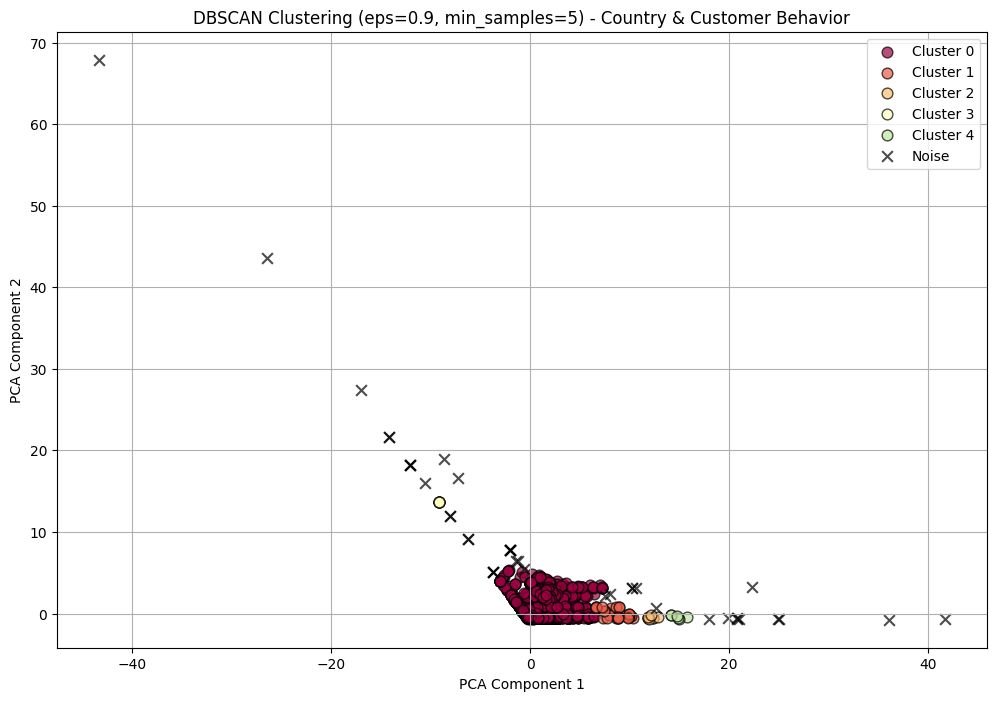

eps: 0.9, min_samples: 5 -> clusters: 5, noise: 41, silhouette score: 0.8737


<ipython-input-8-0ae413b048e2>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],
<ipython-input-8-0ae413b048e2>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_pca_df[clusters == label]['PCA1'],


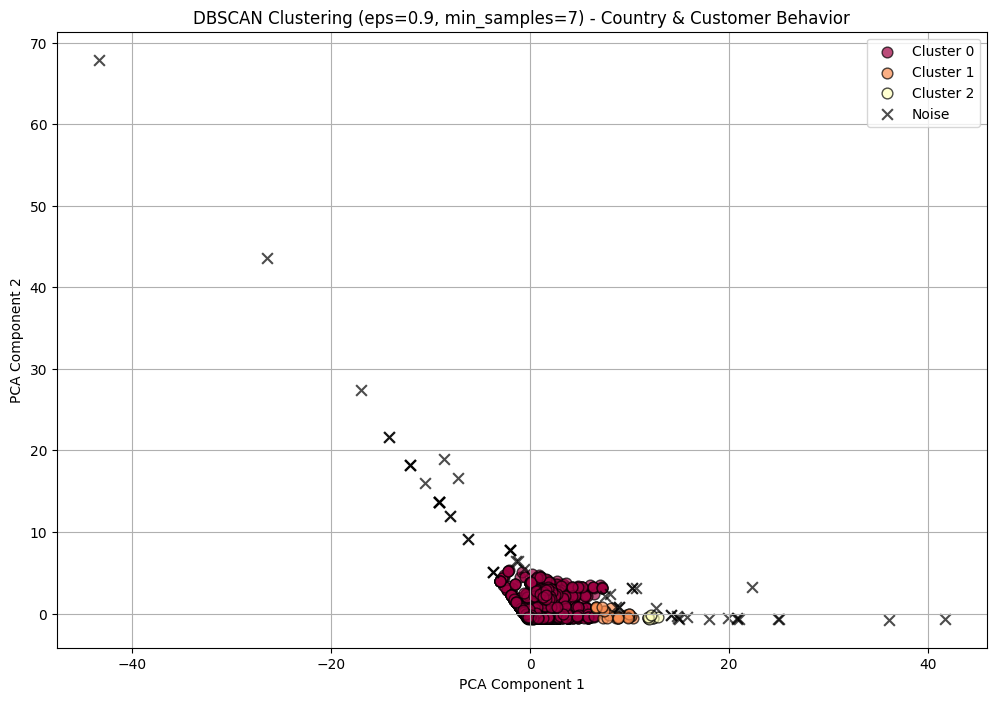

eps: 0.9, min_samples: 7 -> clusters: 3, noise: 55, silhouette score: 0.8728


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Data Cleaning
data_cleaned = data.dropna(subset=['CustomerID', 'Country'])
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

# Feature Selection and Encoding
features = data_cleaned[['Country', 'Quantity', 'UnitPrice']]
features['Country'] = features['Country'].astype('category').cat.codes  # Encode the 'Country' column

# Sampling
sample_size = 30000
features_sampled = features.sample(n=sample_size, random_state=42)

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_sampled)

# PCA Transformation
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
features_pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])

# Parameter values for DBSCAN
eps_values = [0.3, 0.5, 0.7,0.9]
min_samples_values = [3, 5, 7]

# DBSCAN Clustering and Visualization for each combination of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:

        # DBSCAN Model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_pca_df)

        # Visualization
        plt.figure(figsize=(12, 8))
        unique_labels = set(clusters)

        for label in unique_labels:
            if label == -1:  # Noise
                color = 'black'
                marker = 'x'
                label_name = 'Noise'
            else:  # Cluster
                color = plt.cm.Spectral(float(label) / len(unique_labels))
                marker = 'o'
                label_name = f'Cluster {label}'

            plt.scatter(features_pca_df[clusters == label]['PCA1'],
                        features_pca_df[clusters == label]['PCA2'],
                        c=color, marker=marker, label=label_name, s=60, alpha=0.7, edgecolor='k')

        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples}) - Country & Customer Behavior')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Calculate and Print Cluster Metrics
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        if n_clusters > 1:
            score = silhouette_score(features_pca_df, clusters)
        else:
            score = -1  # Cannot calculate silhouette score with one cluster

        print(f"eps: {eps}, min_samples: {min_samples} -> clusters: {n_clusters}, noise: {n_noise}, silhouette score: {score:.4f}")
